In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt


In [2]:
(X_train,y_train),(X_test,y_test)=datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [3]:
X_test.shape

(10000, 32, 32, 3)

In [14]:
X_test[1]

array([[[235, 235, 235],
        [231, 231, 231],
        [232, 232, 232],
        ...,
        [233, 233, 233],
        [233, 233, 233],
        [232, 232, 232]],

       [[238, 238, 238],
        [235, 235, 235],
        [235, 235, 235],
        ...,
        [236, 236, 236],
        [236, 236, 236],
        [235, 235, 235]],

       [[237, 237, 237],
        [234, 234, 234],
        [234, 234, 234],
        ...,
        [235, 235, 235],
        [235, 235, 235],
        [234, 234, 234]],

       ...,

       [[ 87,  99,  89],
        [ 43,  51,  37],
        [ 19,  23,  11],
        ...,
        [169, 184, 179],
        [182, 197, 193],
        [188, 202, 201]],

       [[ 82,  96,  82],
        [ 46,  57,  36],
        [ 36,  44,  22],
        ...,
        [174, 189, 183],
        [185, 200, 196],
        [187, 202, 200]],

       [[ 85, 101,  83],
        [ 62,  75,  48],
        [ 58,  67,  38],
        ...,
        [168, 183, 178],
        [180, 195, 191],
        [186, 200, 199]]

In [4]:
y_train.shape

(50000, 1)

In [5]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

Changing the array from 2D to 1D

In [6]:
y_train=y_train.reshape(-1,)
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [9]:
classes=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [12]:
classes[8]

'ship'

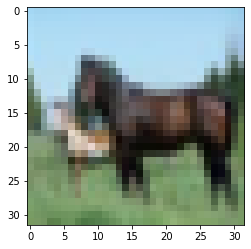

In [7]:
plt.imshow(X_train[12])

In [36]:
def plot_sample(x,y,index):
    plt.figure(figsize=(5,4))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

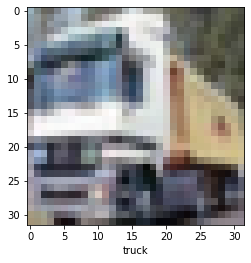

In [37]:
plot_sample(X_train,y_train,1)

In [39]:
X_train=X_train/255
X_test=X_test/255

In [41]:
X_train.shape

(50000, 32, 32, 3)

In [47]:
ann=models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000,activation='relu'),
    layers.Dense(1000,activation='relu'),
    layers.Dense(10,activation='sigmoid')
])

ann.compile(optimizer='SGD',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
ann.fit(X_train,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 64s 41ms/step - loss: 1.8114 - accuracy: 0.3555
Epoch 2/5
1563/1563 [==============================] - 65s 42ms/step - loss: 1.6238 - accuracy: 0.4271
Epoch 3/5
1563/1563 [==============================] - 71s 46ms/step - loss: 1.5430 - accuracy: 0.4563
Epoch 4/5
1563/1563 [==============================] - 67s 43ms/step - loss: 1.4812 - accuracy: 0.4791
Epoch 5/5
1563/1563 [==============================] - 67s 43ms/step - loss: 1.4304 - accuracy: 0.4968


In [48]:
ann.evaluate(X_train,y_train)

1563/1563 [==============================] - 25s 15ms/step - loss: 1.3970 - accuracy: 0.5084


[1.396954894065857, 0.5083600282669067]

In [52]:
from sklearn.metrics import confusion_matrix,classification_report
import numpy as np
y_pred=ann.predict(X_test)
y_pred_classes=[np.argmax(element) for element in y_pred]
print("classification Report: \n",classification_report(y_test,y_pred_classes))

313/313 [==============================] - 4s 13ms/step
classification Report: 
               precision    recall  f1-score   support

           0       0.64      0.44      0.52      1000
           1       0.59      0.65      0.62      1000
           2       0.48      0.19      0.27      1000
           3       0.43      0.19      0.26      1000
           4       0.50      0.29      0.37      1000
           5       0.43      0.33      0.37      1000
           6       0.34      0.82      0.48      1000
           7       0.49      0.61      0.54      1000
           8       0.53      0.72      0.61      1000
           9       0.54      0.57      0.56      1000

    accuracy                           0.48     10000
   macro avg       0.50      0.48      0.46     10000
weighted avg       0.50      0.48      0.46     10000



In [54]:
cnn=models.Sequential([
    layers.Conv2D(filters=45,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax') #in softmax the total sum equals 1.
])

In [62]:
cnn.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
cnn.fit(X_train,y_train,epochs=20)

Epoch 1/20
1563/1563 [==============================] - 22s 14ms/step - loss: 1.4923 - accuracy: 0.4680
Epoch 2/20
1563/1563 [==============================] - 23s 14ms/step - loss: 1.1959 - accuracy: 0.5816
Epoch 3/20
1563/1563 [==============================] - 24s 15ms/step - loss: 1.0724 - accuracy: 0.6259
Epoch 4/20
1563/1563 [==============================] - 23s 15ms/step - loss: 0.9953 - accuracy: 0.6548
Epoch 5/20
1563/1563 [==============================] - 25s 16ms/step - loss: 0.9352 - accuracy: 0.6750
Epoch 6/20
1563/1563 [==============================] - 23s 15ms/step - loss: 0.8839 - accuracy: 0.6938
Epoch 7/20
1563/1563 [==============================] - 25s 16ms/step - loss: 0.8435 - accuracy: 0.7066
Epoch 8/20
1563/1563 [==============================] - 25s 16ms/step - loss: 0.8004 - accuracy: 0.7222
Epoch 9/20
1563/1563 [==============================] - 25s 16ms/step - loss: 0.7654 - accuracy: 0.7333
Epoch 10/20
1563/1563 [==============================] - 26s 17m

In [63]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 1.4292 - accuracy: 0.6259


[1.4291844367980957, 0.6258999705314636]

In [64]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

In [65]:
y_test=y_test.reshape(-1,)

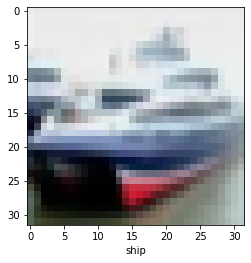

In [66]:
plot_sample(X_test,y_test,1)

In [68]:
y_pred=cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 2s 5ms/step


array([[3.1968125e-04, 7.4228933e-07, 9.2088094e-04, 8.2704753e-01,
        8.5984240e-05, 9.8274054e-04, 1.9957151e-02, 1.1657645e-06,
        1.5067916e-01, 5.0213480e-06],
       [6.9618510e-04, 3.2613505e-02, 6.9680340e-08, 2.1712566e-08,
        2.7192772e-07, 1.1441953e-09, 5.0655705e-11, 1.8807771e-11,
        9.6661133e-01, 7.8584337e-05],
       [7.3165101e-01, 2.1873862e-03, 1.2571918e-04, 7.7311284e-05,
        6.8317015e-05, 1.7345226e-06, 3.8873861e-08, 4.1097279e-05,
        2.5670981e-01, 9.1374861e-03],
       [1.4607497e-01, 1.5044006e-04, 3.2055993e-03, 8.2978899e-05,
        1.6720073e-03, 1.6319153e-06, 3.4722293e-04, 3.3988492e-06,
        8.4840393e-01, 5.7823021e-05],
       [7.6864346e-09, 7.2276586e-04, 8.4721705e-06, 5.1383399e-03,
        3.8371700e-01, 8.6537699e-07, 6.1040837e-01, 2.0044965e-08,
        2.5056360e-07, 3.8957769e-06]], dtype=float32)

In [70]:
y_classes=[np.argmax(element) for element in y_pred]
y_classes[:5]


[3, 8, 0, 8, 6]

In [72]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [73]:
print("classification report: \n",classification_report(y_test,y_classes))

classification report: 
               precision    recall  f1-score   support

           0       0.60      0.68      0.64      1000
           1       0.77      0.71      0.74      1000
           2       0.45      0.55      0.49      1000
           3       0.48      0.43      0.45      1000
           4       0.55      0.62      0.58      1000
           5       0.59      0.46      0.51      1000
           6       0.76      0.66      0.70      1000
           7       0.70      0.68      0.69      1000
           8       0.71      0.76      0.73      1000
           9       0.72      0.71      0.72      1000

    accuracy                           0.63     10000
   macro avg       0.63      0.63      0.63     10000
weighted avg       0.63      0.63      0.63     10000

